# Auckland and Cities in Australia

In [1]:
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Auckland information

In [2]:
source = requests.get('https://www.latlong.net/category/districts-157-16.html').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table')

my_table = []
for tr in table.find_all('tr'):
    for td in tr.find_all('td'):
        my_table.append(td.text)
        
my_table = np.reshape(my_table,(-1,3))  
df_nz = pd.DataFrame(my_table,columns=['name','Latitude','Longitude'])
df_nz.drop([1,4], inplace=True)
df_nz.reset_index(drop=True)
df_nz['Latitude'] = df_nz['Latitude'].apply(float)
df_nz['Longitude'] = df_nz['Longitude'].apply(float)
df_nz['Borough'] = df_nz['name'].apply(lambda x: x.split(',')[1])
df_nz['Neighbourhood'] = df_nz['name'].apply(lambda x: x.split(',')[0])
df_nz.drop(columns='name', inplace=True)
df_nz.reset_index(inplace=True,drop=True)
df_nz = df_nz[['Borough','Neighbourhood','Latitude','Longitude']]
df_nz

,Borough,Neighbourhood,Latitude,Longitude
0,Auckland,Rosedale,-36.746212,174.737122
1,Auckland,Henderson,-36.873928,174.627731
2,Auckland,Parnell,-36.854065,174.779877


In [3]:
df_nz_agg = df_nz.copy()
df_nz_agg['Neighbourhood'] = 'Auckland'
df_nz_agg

,Borough,Neighbourhood,Latitude,Longitude
0,Auckland,Auckland,-36.746212,174.737122
1,Auckland,Auckland,-36.873928,174.627731
2,Auckland,Auckland,-36.854065,174.779877


## Cities in Australia

In [4]:
def Borough_return(x):
    x = x.split(',')
    if len(x) == 1:
        return x[0]
    elif len(x) == 2:
        return x[0]
    else:
        return x[1]

def Neigh_return(x):
    x = x.split(',')
    if len(x) == 1:
        return x[0]
    elif len(x) == 2:
        return x[0]
    else:
        return x[0]

In [5]:
source_auz = requests.get('https://www.latlong.net/category/cities-14-15.html').text
soup_auz = BeautifulSoup(source_auz, 'lxml')
table_auz = soup_auz.find('table')

my_table_auz = []
for tr in table_auz.find_all('tr'):
    for td in tr.find_all('td'):
        my_table_auz.append(td.text)

my_table_auz = np.reshape(my_table_auz,(-1,3))  
df_auz = pd.DataFrame(my_table_auz,columns=['name','Latitude','Longitude'])
df_auz['Latitude'] = df_auz['Latitude'].apply(float)
df_auz['Longitude'] = df_auz['Longitude'].apply(float)
df_auz['Borough'] = df_auz['name'].apply(Borough_return)
df_auz['Neighbourhood'] = df_auz['name'].apply(Neigh_return)
df_auz.drop(columns='name', inplace=True)
df_auz.reset_index(inplace=True,drop=True)
df_auz = df_auz[['Borough','Neighbourhood','Latitude','Longitude']]
df_auz

,Borough,Neighbourhood,Latitude,Longitude
0,Queensland,Sunshine Coast,-26.650000,153.066666
1,Queensland,Gold Coast,-28.016666,153.399994
2,VIC,Melbourne,-37.840935,144.946457
3,SA,Adelaide,-34.921230,138.599503
4,TAS,Launceston,-41.429825,147.157135
5,SA,North Adelaide,-34.906101,138.593903
6,QLD,Townsville City,-19.258965,146.816956
7,QLD,Cairns City,-16.925491,145.754120
8,WA,Perth,-31.953512,115.857048
9,VIC,Mildura,-34.206841,142.136490


Merge two dataframes.

In [6]:
frames = [df_auz, df_nz]
df_all = pd.concat(frames)
df_all.reset_index(inplace=True,drop=True)
df_all

,Borough,Neighbourhood,Latitude,Longitude
0,Queensland,Sunshine Coast,-26.650000,153.066666
1,Queensland,Gold Coast,-28.016666,153.399994
2,VIC,Melbourne,-37.840935,144.946457
3,SA,Adelaide,-34.921230,138.599503
4,TAS,Launceston,-41.429825,147.157135
5,SA,North Adelaide,-34.906101,138.593903
6,QLD,Townsville City,-19.258965,146.816956
7,QLD,Cairns City,-16.925491,145.754120
8,WA,Perth,-31.953512,115.857048
9,VIC,Mildura,-34.206841,142.136490


In [7]:
df_all_drop = df_all.drop([27,28]).reset_index(drop=True)

## Foursquare API

In [8]:
address = 'Auckland, NZ'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Auckland are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Auckland are -36.8534665, 174.7655514.


In [9]:
CLIENT_ID = 'VFMXFZOMHTXF5DATLEKFWT0MTCMT5AIYZDVBUGUURETN0HKH' 
CLIENT_SECRET = 'VIFZAB13AE2AXAUENWQTY1SIFTSGZBRR2HONRCIDQAVVNYU3' 
VERSION = '20180605' 

In [10]:
neighborhood_latitude = df_all.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_all.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_all.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Sunshine Coast are -26.65, 153.066666.


In [11]:
LIMIT = 100
radius = 1000 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [12]:
results = requests.get(url).json()

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,IGA X-press Maroochy Waters,Grocery Store,-26.643625,153.068465
1,Bradman Avenue Boat Ramp,Pier,-26.642882,153.069121
2,Maroochy River,River,-26.642893,153.069147
3,Aroma Bliss Cafe,Café,-26.642863,153.069143


Only 4 results returned. Sunshine Coast must be a quiet town!

In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
all_venues = getNearbyVenues(names=df_all['Neighbourhood'],
                                   latitudes=df_all['Latitude'],
                                   longitudes=df_all['Longitude']
                                  )

Sunshine Coast
Gold Coast
Melbourne
Adelaide
Launceston
North Adelaide
Townsville City
Cairns City
Perth
Mildura
Ziyou Today
Coffs Harbour NSW 2450
Orange
Bendigo
Albury
Wollongong
Darwin
Terrey Hills
Bankstown NSW
Westmead
Brisbane
Gladstone QLD
Phillip ACT
Gosford
Mount Gambier
Sydney
Glenore Grove
Rosedale
Henderson
Parnell


In [18]:
all_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adelaide,100,100,100,100,100,100
Albury,46,46,46,46,46,46
Bankstown NSW,55,55,55,55,55,55
Bendigo,54,54,54,54,54,54
Brisbane,100,100,100,100,100,100
Cairns City,14,14,14,14,14,14
Coffs Harbour NSW 2450,12,12,12,12,12,12
Darwin,70,70,70,70,70,70
Gladstone QLD,6,6,6,6,6,6


As discussed in the report, there seems to be an unbalnce in the data contribution from each city.

In [19]:
print('There are {} uniques categories.'.format(len(all_venues['Venue Category'].unique())))

There are 184 uniques categories.


In [20]:
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

all_onehot.head()

,Neighborhood,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cricket Ground,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Noodle House,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,South Indian Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,Sunshine Coast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sunshine Coast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sunshine Coast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sunshine Coast,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [21]:
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()
all_grouped.head()

,Neighborhood,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cricket Ground,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,History Museum,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Noodle House,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Snack Place,South Indian Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Zoo
0,Adelaide,0.01,0.0,0.01,0.010000,0.0,0.0,0.010000,0.0,0.030000,0.00,0.0,0.020000,0.060000,0.0,0.00,0.00,0.01,0.000000,0.0,0.01,0.00,0.00,0.0,0.00,0.0,0.01,0.0,0.000000,0.000000,0.0,0.010000,0.01,0.000000,0.0,0.050000,0.01,0.000000,0.02,0.0,0.00,0.02,0.040000,0.00,0.000000,0.010000,0.00,0.0,0.02,0.01,0.0,0.0,0.000000,0.01,0.00,0.00,0.0,0.000000,0.00,0.010000,0.00,0.010000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.01,0.0,0.0,0.01,0.0,0.0,0.0,0.070000,0.0,0.00,0.01,0.0,0.01,0.030000,0.030000,0.010000,0.01,0.00,0.0,0.000000,0.01,0.000000,0.0,0.02,0.020000,0.000000,0.00,0.0,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.0,0.0,0.02,0.00,0.000000,0.010000,0.01,0.01,0.000000,0.0,0.020000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.020000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.01,0.01,0.000000,0.0,0.03,0.0,0.020000,0.000000,0.0,0.00,0.0,0.01,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.010000,0.01,0.000000,0.01,0.02,0.0,0.010000,0.010000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.02,0.0,0.010000,0.0,0.00,0.030000,0.01,0.0
1,Albury,0.00,0.0,0.00,0.000000,0.0,0.0,0.021739,0.0,0.000000,0.00,0.0,0.000000,0.065217,0.0,0.00,0.00,0.00,0.021739,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.130435,0.00,0.021739,0.00,0.0,0.00,0.00,0.021739,0.00,0.021739,0.000000,0.00,0.

In [22]:
all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

Text(0.5, 1.0, 'Sume of Squared Error vs number of k')

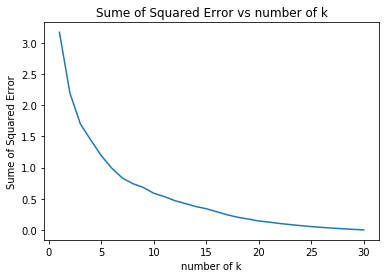

In [23]:
sse = []

for k in range(1,31):
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 20)
    k_means.fit(all_grouped_clustering)
    sse.append(k_means.inertia_)
    
sse = pd.DataFrame(sse)
sse.reset_index(inplace=True)
sse['index'] = sse['index']+1
sse.rename(columns={'index':'number of k',0:'Sume of Squared Error'},inplace=True)
sns.lineplot(x='number of k',y='Sume of Squared Error',data=sse).set_title('Sume of Squared Error vs number of k')

I can see that there is an elbow around k = 10.

In [24]:
k_means = KMeans(init = "k-means++", n_clusters = 10, n_init = 20)
k_means.fit(all_grouped_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
all_merged = df_all.copy()

all_merged.sort_values('Neighbourhood',inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_merged.insert(0, 'Cluster Labels', k_means.labels_)

all_merged

,Cluster Labels,Borough,Neighbourhood,Latitude,Longitude
3,0,SA,Adelaide,-34.921230,138.599503
14,0,NSW,Albury,-36.080780,146.916473
18,4,Bankstown NSW,Bankstown NSW,-33.917290,151.035889
13,0,VIC,Bendigo,-36.757786,144.278702
20,0,QLD,Brisbane,-27.470125,153.021072
7,4,QLD,Cairns City,-16.925491,145.754120
11,8,Coffs Harbour NSW 2450,Coffs Harbour NSW 2450,-30.296276,153.114136
16,0,Northern Territory,Darwin,-12.462827,130.841782
21,5,Gladstone QLD,Gladstone QLD,-23.843138,151.268356
26,2,Queensland,Glenore Grove,-27.529953,152.407181


In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=3)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_merged['Latitude'], all_merged['Longitude'], 
                                  all_merged['Neighbourhood'], all_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
all_venues_sorted = pd.DataFrame(columns=columns)
all_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    all_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

all_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adelaide,Hotel,Bar,Café,Coffee Shop,Italian Restaurant,Australian Restaurant,Wine Bar,Japanese Restaurant,Sculpture Garden,Pub
1,Albury,Café,Hotel,Bar,Motel,Thai Restaurant,Department Store,Shopping Mall,Italian Restaurant,Pharmacy,Garden
2,Bankstown NSW,Café,Vietnamese Restaurant,Fast Food Restaurant,Gym,Sports Bar,Supermarket,Buffet,Chinese Restaurant,Coffee Shop,Convenience Store
3,Bendigo,Café,Pizza Place,Restaurant,Pub,Fast Food Restaurant,Theater,Thai Restaurant,Liquor Store,Shopping Mall,Supermarket
4,Brisbane,Café,Coffee Shop,Hotel,Korean Restaurant,Burger Joint,Bookstore,Pub,Australian Restaurant,Art Gallery,Dumpling Restaurant
5,Cairns City,Café,Sporting Goods Shop,Toy / Game Store,Supermarket,Shopping Mall,Burger Joint,Sandwich Place,Basketball Court,Hotel,Home Service
6,Coffs Harbour NSW 2450,Chinese Restaurant,Supermarket,Pub,Electronics Store,Shopping Mall,Garden,Fishing Store,Sandwich Place,Café,Pizza Place
7,Darwin,Hotel,Café,Australian Restaurant,Pub,Bar,Hostel,Vietnamese Restaurant,Asian Restaurant,Coffee Shop,Plaza
8,Gladstone QLD,Pub,Pier,Fast Food Restaurant,Beach,Park,Sports Bar,Department Store,Deli / Bodega,Flower Shop,Fishing Store
9,Glenore Grove,Convenience Store,Dumpling Restaurant,Food & Drink Shop,Food,Flower Shop,Fishing Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Event Space


In [33]:
all_combined = all_merged.copy()
all_combined.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
all_combined.head()

,Cluster Labels,Borough,Neighborhood,Latitude,Longitude
3,0,SA,Adelaide,-34.921230,138.599503
14,0,NSW,Albury,-36.080780,146.916473
18,4,Bankstown NSW,Bankstown NSW,-33.917290,151.035889
13,0,VIC,Bendigo,-36.757786,144.278702
20,0,QLD,Brisbane,-27.470125,153.021072


In [34]:
all_combined = all_combined.join(all_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
all_combined.reset_index(drop=True,inplace=True)
# all_combined_cluster = all_combined.groupby('Cluster Labels')
# all_combined_cluster.describe()
cluster_group = pd.pivot_table(all_combined,index=['Cluster Labels','Neighborhood']) #create a pivot table and place each city in the cluster they belong to.
cluster_group

Latitude   Longitude
Cluster Labels Neighborhood                                 
0              Adelaide               -34.921230  138.599503
               Albury                 -36.080780  146.916473
               Bendigo                -36.757786  144.278702
               Brisbane               -27.470125  153.021072
               Darwin                 -12.462827  130.841782
               Gosford                -33.425018  151.342224
               Henderson              -36.873928  174.627731
               Mildura                -34.206841  142.136490
               Mount Gambier          -37.824429  140.783783
               North Adelaide         -34.906101  138.593903
               Orange                 -33.283577  149.101273
               Perth                  -31.953512  115.857048
               Phillip ACT            -35.343784  149.082977
               Townsville City        -19.258965  146.816956
               Wollongong             -34.425072  150.893143
1              Launceston             -41.429825  147.157135
2              Glenore Grove          -27.529953  152.407181
3              Terrey Hills           -33.683212  151.224396
4              Bankstown NSW          -33.917290  151.035889
               Cairns City            -16.925491  145.754120
               Melbourne              -37.840935  144.946457
               Parnell                -36.854065  174.779877
               Rosedale               -36.746212  174.737122
               Sydney                 -33.865143  151.209900
               Westmead               -33.807690  150.987274
5              Gladstone QLD          -23.843138  151.268356
6              Sunshine Coast         -26.650000  153.066666
7              Ziyou Today            -37.649967  144.880600
8              Coffs Harbour NSW 2450 -30.296276  153.114136
9              Gold Coast             -28.016666  153.399994

It looks like Parnell and Henderson belong to different clusters. Let's see how they differ from each other.

In [35]:
cluster_parnell = all_combined.loc[all_combined['Cluster Labels'] == all_combined[all_combined['Neighborhood']=='Parnell']['Cluster Labels'].values[0], 
                            all_combined.columns[[2]+list(range(5, all_combined.shape[1]))]]

In [36]:
cluster_parnell.drop('Neighborhood',inplace=True,axis=1)
cluster_parnell = pd.melt(cluster_parnell)

In [37]:
cluster_parnell = pd.DataFrame(cluster_parnell.groupby('variable').describe())
cluster_parnell = cluster_parnell.append(cluster_parnell.iloc[0])
cluster_parnell[1:]

value                              
                       count unique               top freq
variable                                                  
1st Most Common Venue      7      1              Café    7
2nd Most Common Venue      7      6             Hotel    2
3rd Most Common Venue      7      6       Coffee Shop    2
4th Most Common Venue      7      7       Bus Station    1
5th Most Common Venue      7      7        Sports Bar    1
6th Most Common Venue      7      6              Park    2
7th Most Common Venue      7      6    Sandwich Place    2
8th Most Common Venue      7      7  Asian Restaurant    1
9th Most Common Venue      7      7        Steakhouse    1
10th Most Common Venue     7      7        Steakhouse    1

Next, we try Henderson.

In [38]:
cluster_Henderson = all_combined.loc[all_combined['Cluster Labels'] == all_combined[all_combined['Neighborhood']=='Henderson']['Cluster Labels'].values[0],
                            all_combined.columns[[2]+list(range(5, all_combined.shape[1]))]]
cluster_Henderson.drop('Neighborhood',inplace=True,axis=1)
cluster_Henderson = pd.melt(cluster_Henderson)

In [39]:
cluster_Henderson = pd.DataFrame(cluster_Henderson.groupby('variable').describe())
cluster_Henderson = cluster_Henderson.append(cluster_Henderson.iloc[0])
cluster_Henderson[1:]

value                                 
                       count unique                  top freq
variable                                                     
1st Most Common Venue     15      6                 Café    8
2nd Most Common Venue     15     12                 Café    2
3rd Most Common Venue     15     11                 Café    2
4th Most Common Venue     15      9          Coffee Shop    3
5th Most Common Venue     15     12   Mexican Restaurant    2
6th Most Common Venue     15     14    Indian Restaurant    2
7th Most Common Venue     15     14      Thai Restaurant    2
8th Most Common Venue     15     15  Japanese Restaurant    1
9th Most Common Venue     15     13        Shopping Mall    2
10th Most Common Venue    15     14          Supermarket    2

Sounds about right! I live in Auckland and can confirm that Parnell is closer to the urban city area and has the characteristics described by cluster 4. Henderson on the other hand is a residential area and it is located away from the urban city area.